<a href="https://colab.research.google.com/github/FabioMMaia/Reading_Tables_Documents/blob/main/Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# img_for_box_extraction_path='/content/drive/MyDrive/Projeto ML/2023/Read Tables OCR/1_WbdgnoJtNDuTF2qmjVHVUg.webp'
img_for_box_extraction_path='/content/drive/MyDrive/Projeto ML/2023/Read Tables OCR/OJzYY.jpg'

In [26]:
# Read the image
img = cv2.imread(img_for_box_extraction_path, 0)
 
# Thresholding the image
(thresh, img_bin) = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY|     cv2.THRESH_OTSU)
# Invert the image
img_bin = 255-img_bin 
# cv2.imwrite("Image_bin.jpg",img_bin)

(444, 1037)
(444, 1037)


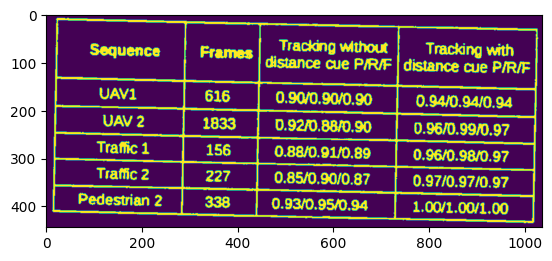

In [27]:
print(np.array(img).shape)

print(np.array(img_bin).shape)

plt.imshow(img_bin)
plt.show()

In [28]:
# Defining a kernel length
kernel_length = np.array(img).shape[1]//80
 
# A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))

# A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))

# A kernel of (3 X 3) ones.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

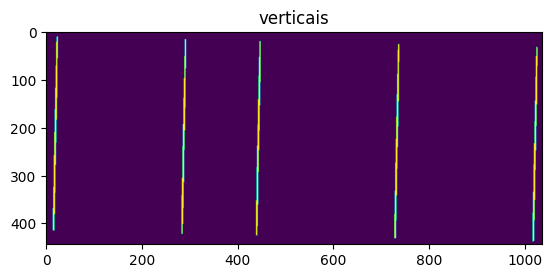

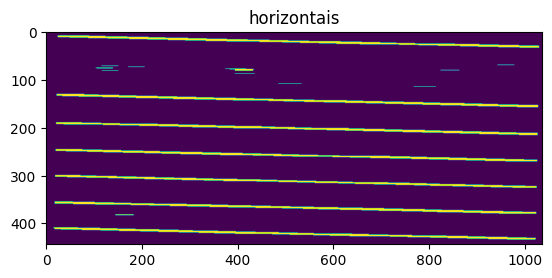

In [29]:
# Morphological operation to detect vertical lines from an image
img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
# cv2.imwrite("verticle_lines.jpg",verticle_lines_img)

# Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
# cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)

plt.imshow(verticle_lines_img)
plt.title('verticais')
plt.show()

plt.imshow(horizontal_lines_img)
plt.title('horizontais')
plt.show()

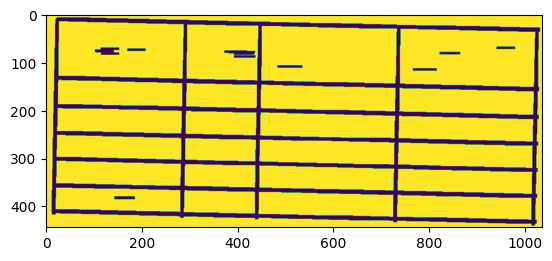

In [30]:
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha

# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)


plt.imshow(img_final_bin)
# cv2.imwrite("img_final_bin.jpg",img_final_bin)Thank

In [31]:
# import the necessary packages
# import numpy as np
import argparse
import imutils
# import cv2

def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [32]:
# Find contours for image, which will detect all the boxes
# im2, 
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Sort all the contours by top to bottom.
(contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")

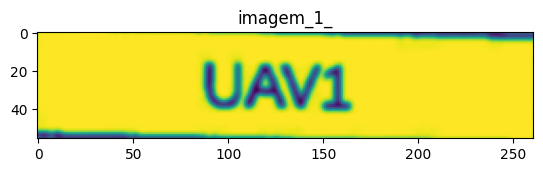

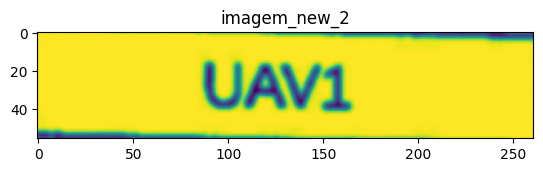

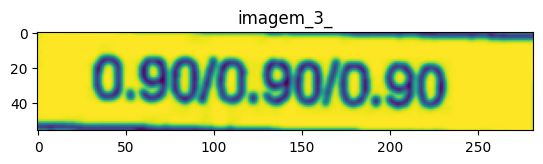

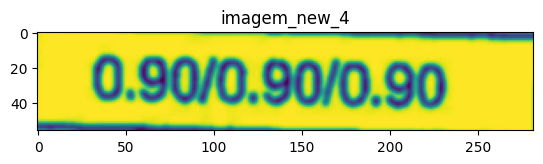

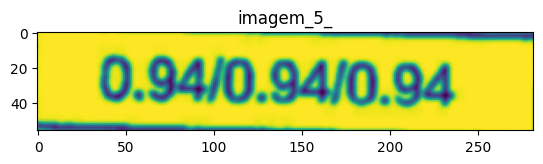

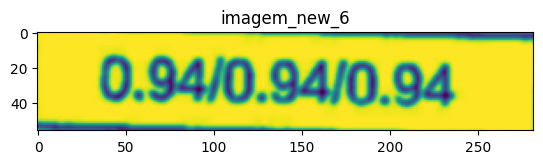

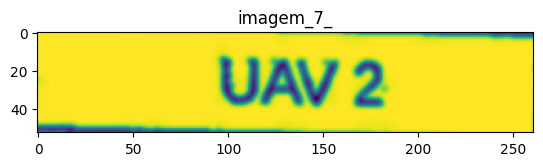

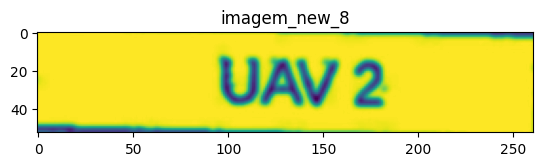

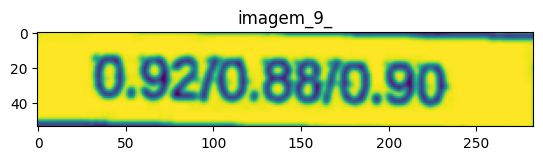

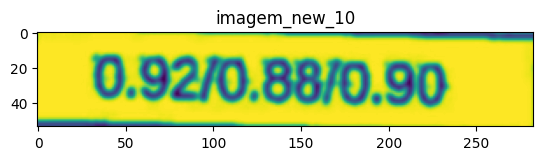

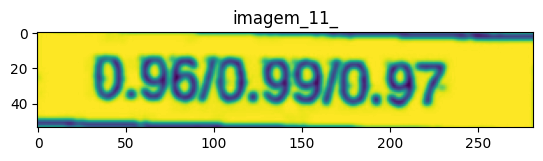

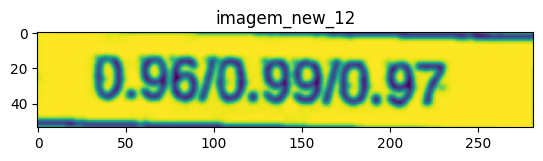

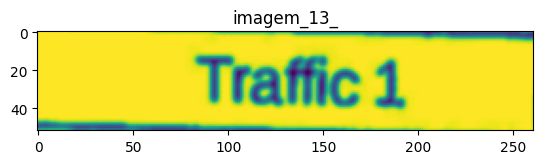

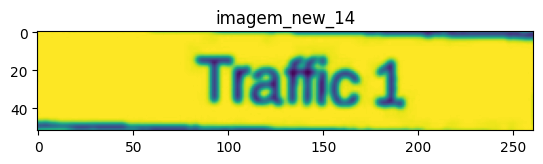

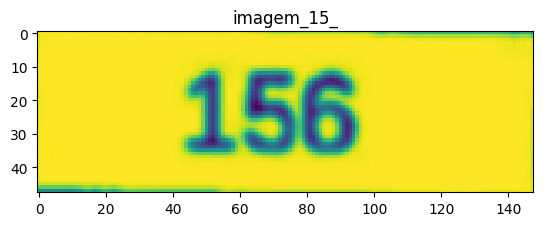

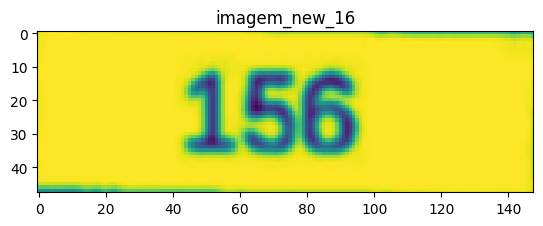

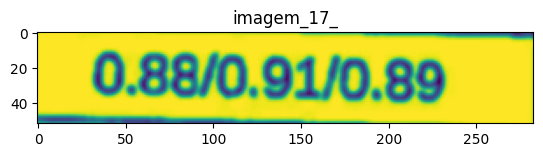

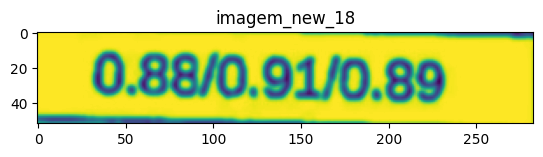

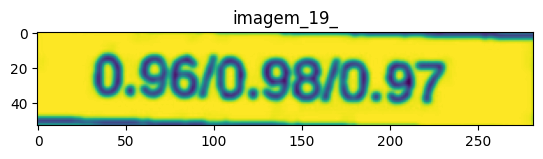

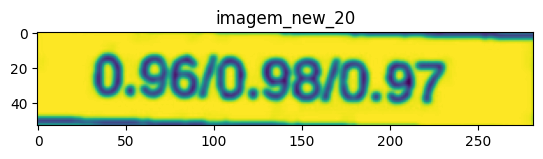

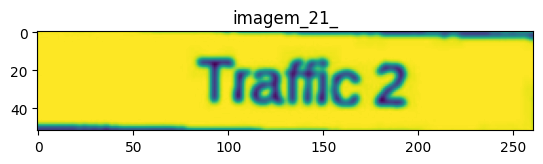

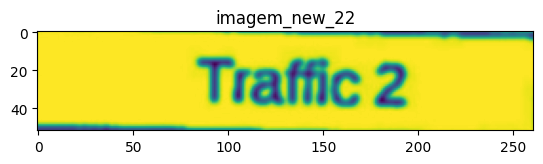

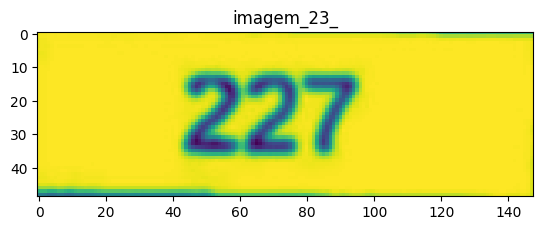

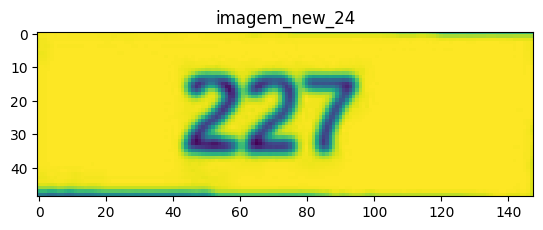

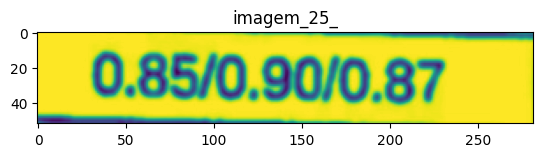

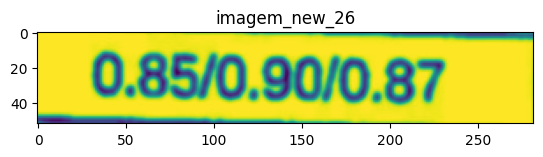

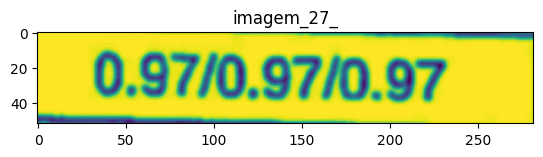

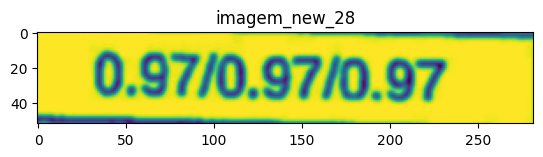

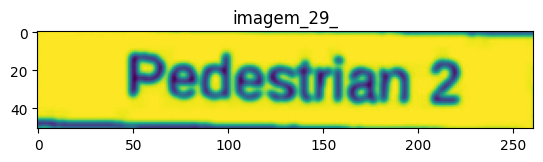

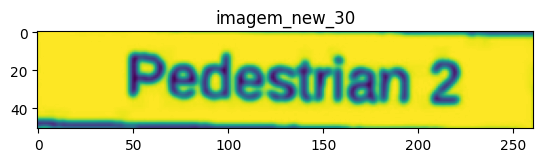

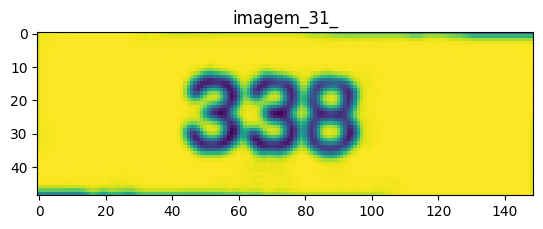

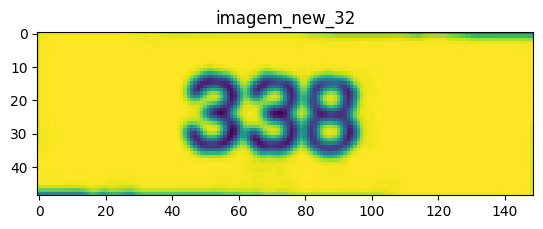

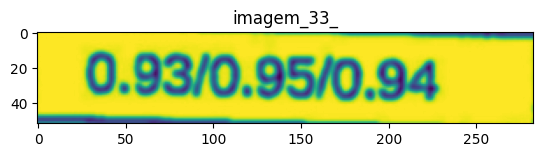

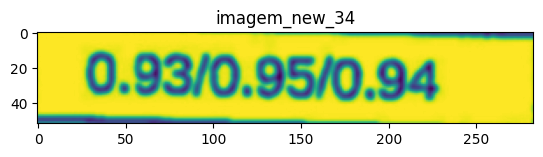

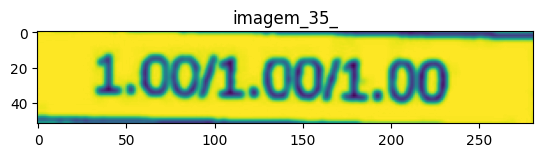

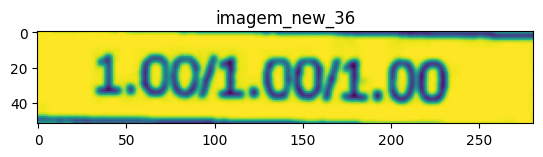

In [33]:
idx = 0
for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    if (w > 80 and h > 20) and w > 3*h:
        idx += 1
        new_img = img[y:y+h, x:x+w]
        # cv2.imwrite(cropped_dir_path+str(idx) + '.png', new_img)
        plt.imshow(new_img)
        plt.title(f'imagem_{idx}_')
        plt.show()

# If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.
    if (w > 80 and h > 20) and w > 3*h:
        idx += 1
        new_img = img[y:y+h, x:x+w]
        # cv2.imwrite(cropped_dir_path+str(idx) + '.png', new_img)
        plt.imshow(new_img)
        plt.title(f'imagem_new_{idx}')
        plt.show()

In [34]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 2s (2,945 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [35]:
# Instalação de bibliotecas no Google Colaboratory.
!pip install Pillow
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
from PIL import Image
import pytesseract

In [37]:
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

In [40]:
# print(pytesseract.image_to_string(Image.open('python-assert.png')))
print(pytesseract.image_to_string(new_img))

1.00/1.00/1.00



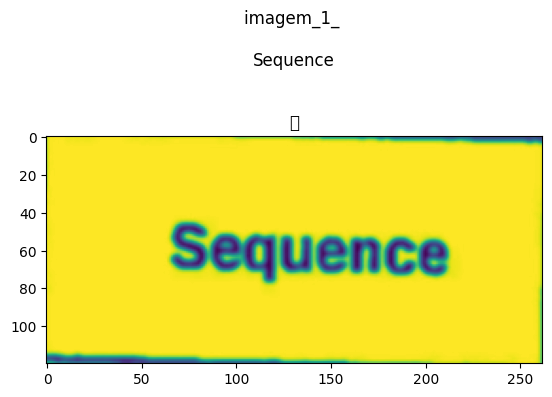

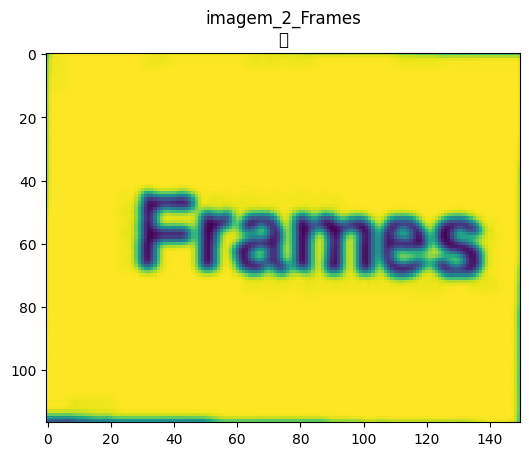

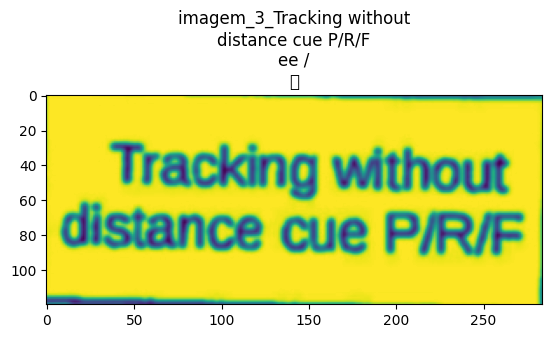

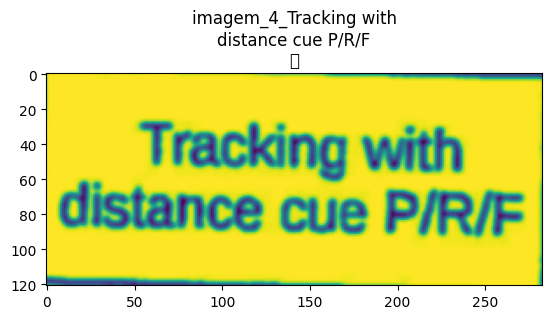

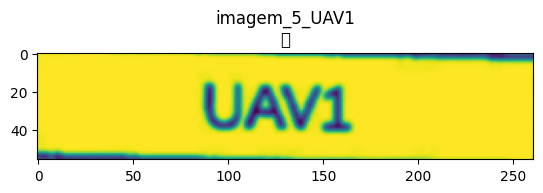

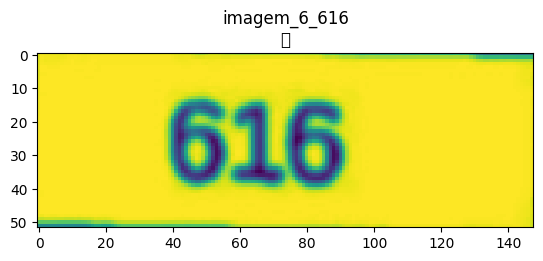

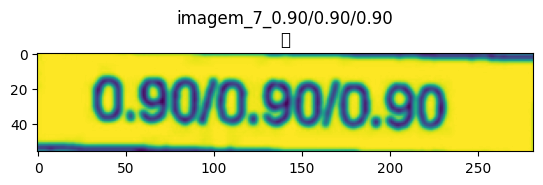

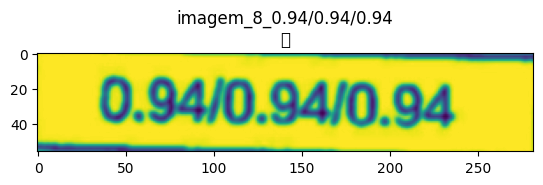

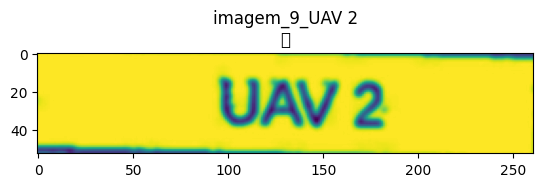

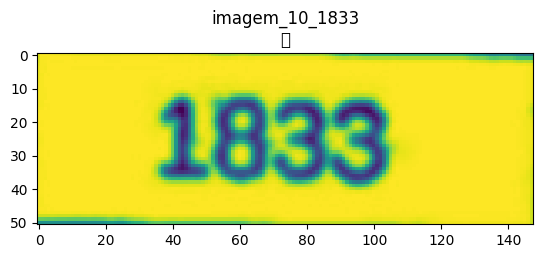

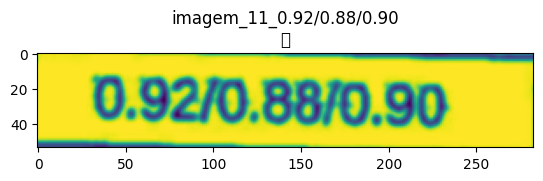

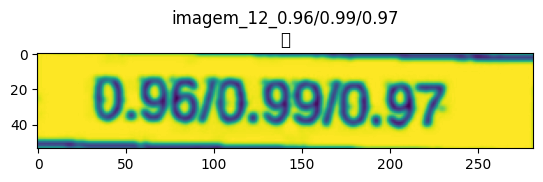

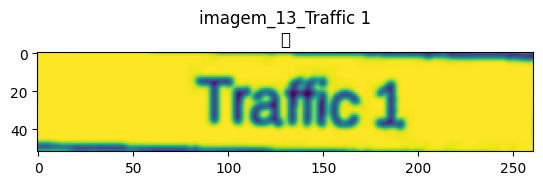

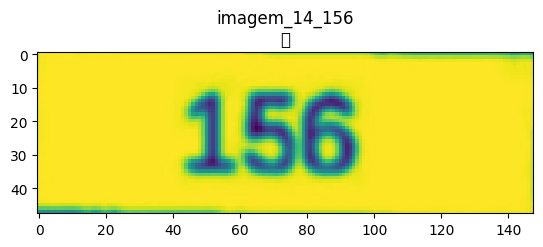

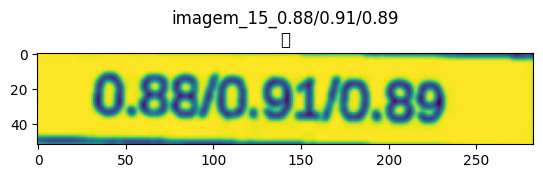

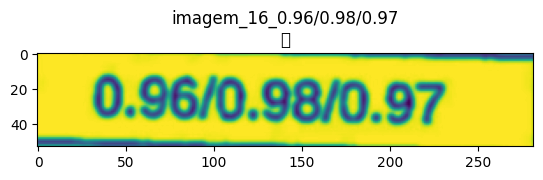

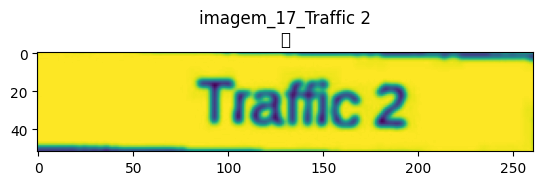

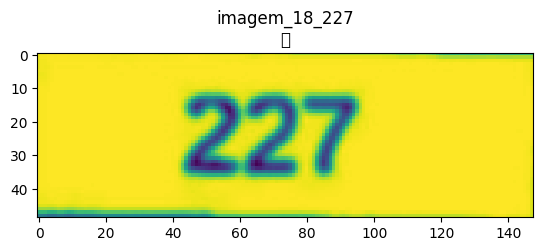

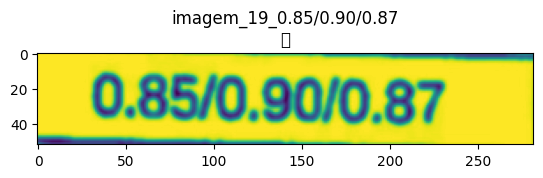

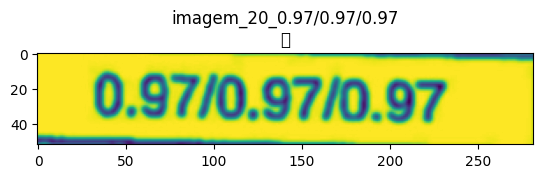

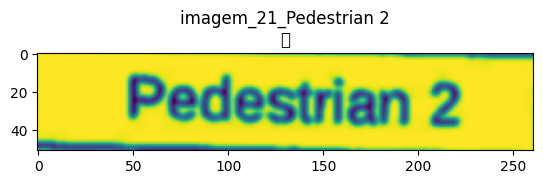

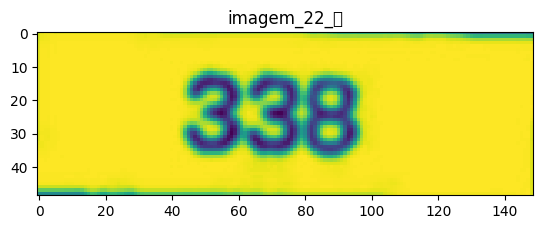

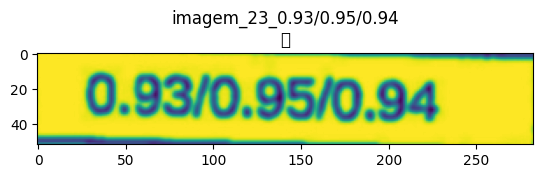

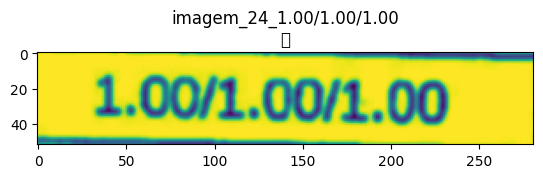

In [51]:
idx = 0
ocr_results = []

for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    if (w > 80 and h > 20) and (w < 500 and h < 300):#  and w > 1.5*h :
        idx += 1
        new_img = img[y:y+h, x:x+w]
        # cv2.imwrite(cropped_dir_path+str(idx) + '.png', new_img)
        plt.imshow(new_img)
        ocr_idx  = pytesseract.image_to_string(new_img)
        ocr_results.append(ocr_idx)
        plt.title(f'imagem_{idx}_{ocr_idx}')
        plt.show()

# If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.
    # if (w > 80 and h > 20) and w > 3*h:
    #     idx += 1
    #     new_img = img[y:y+h, x:x+w]
    #     # cv2.imwrite(cropped_dir_path+str(idx) + '.png', new_img)
    #     plt.imshow(new_img)
    #     plt.title(f'imagem_{idx}_{pytesseract.image_to_string(new_img)}')
    #     plt.show()

In [74]:
import pandas as pd

n_cols = 4

table = []

for i in range(0,10):
  print(i)
  row = ocr_results[4*i:4*(i+1)]
  if row!=[]:
    table.append(row)
  else:
    break

0
1
2
3
4
5
6


In [79]:
df = pd.DataFrame(table)
df=df.T.set_index(0).T
df

,\n\nSequence\n\n \n,Frames\n,Tracking without\ndistance cue P/R/F\nee /\n,Tracking with\ndistance cue P/R/F\n
1,UAV1\n,616\n,0.90/0.90/0.90\n,0.94/0.94/0.94\n
2,UAV 2\n,1833\n,0.92/0.88/0.90\n,0.96/0.99/0.97\n
3,Traffic 1\n,156\n,0.88/0.91/0.89\n,0.96/0.98/0.97\n
4,Traffic 2\n,227\n,0.85/0.90/0.87\n,0.97/0.97/0.97\n
5,Pedestrian 2\n,,0.93/0.95/0.94\n,1.00/1.00/1.00\n


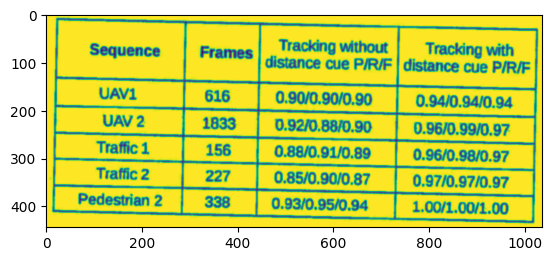

In [59]:
plt.imshow(img)
plt.show()